# Forma y función en el universo Pokémon

Los Pokémon son una clase de criaturas fantásticas inspiradas en animales reales, insectos, objetos, plantas o criaturas mitológicas con un sistema de evolución lamarckiano. Se originan en una serie de videojuegos iniciada en el año 1996. En estos juegos, cada personaje posee un conjunto de Pokémones, cada uno con distintas habilidades y poderes, y su objetivo es enfrentarlos a los Pokémones de distintos rivales. 

Entre otros atributos, los Pokémon se caracterizan por sus puntos de salud (HP), los cuales determinan su resistancia ante ataques, su poder de ataque, su poder de defensa, y su velocidad. A mayor valor de estos atributos, más poderoso el Pokémon en cuestión. Algunos pocos Pokémon seleccionados pertenecen a la categoría de "legendarios" y típicamente son los más poderosos de todos.

El objetivo de este TP es clasificar a los Pokémon de acuerdo a su aspecto físico (forma) y luego evaluar si esta clasificación se asocia a características especiales de los Pokémon (función). ¿Son los Pokémon más grandes más poderosos? ¿Y los más pequeños, más rápidos? ¿Qué aspecto suelen tener los Pokémon legendarios?

Para ello, partimos de dos fuentes de datos. El aspecto de los Pokémon está dado por sus *sprites* (matrices numéricas).

Los datos están disponibles en este directorio de Drive: https://drive.google.com/drive/folders/1YwkHKpeJsnm6h5usrfQPs0qWzDHDmmO5?usp=sharing

Cargamos archivos que tienen los nombres y los *sprites*:


In [ ]:
from google.colab import drive
import pickle
import pandas as pd
import numpy as np

drive.mount('/content/drive', force_remount=True)

filename = '/content/drive/My Drive/LaboDatos2022/TerceraEjercitacion/pokemon_imagenes.p'

file = open(filename, 'rb')
data = pickle.load(file)
file.close()

nombres= data['nombres']
imagenes = data['imagenes']

Mounted at /content/drive


La variable *nombres* es una lista con los nombres mientras que imagenes tiene los *sprites* correspondientes, en el mismo orden. Podemos examinarlos uno por uno:

bayleef
(56, 68)


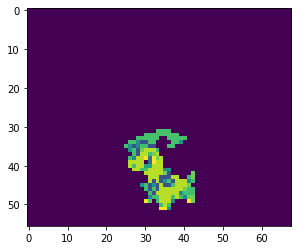

In [ ]:
import matplotlib.pyplot as plt

n=4# elijo el número de Pokémon que quiero visualizar
plt.imshow(imagenes[n])
print(nombres[n]) # nombre del Pokémon
print(imagenes[n].shape) # tamaño del sprite (todos tienen el mismo tamaño)

Por otro lado, la información sobre los atributos de cada Pokémon (función) esta en un dataframe aparte:

In [ ]:
filename = '/content/drive/My Drive/LaboDatos2022/TerceraEjercitacion/pokemon_dataframe.csv'
df = pd.read_csv(filename)
df.head()

,Unnamed: 0,level_0,index,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,0,0,0,1,bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,1,1,1,2,ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,2,2,2,3,venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,3,4,4,charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
4,4,4,5,5,charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False


Para poder trabajar con algoritmos de reducción de la dimensión y clustering, primero tenemos que representar los datos de sprites como una matriz, para eso tenemos que "desenrollarlos" como vimos en clase:

In [ ]:
data = np.zeros((len(nombres),56*68))

for n,img in enumerate(imagenes):
  img.resize(56*68)
  data[n,:] = img



1.   Usar el criterio de la Silueta para verificar que hay un máximo local cerca de k=8 clusters. Aplicar el algoritmo kmeans con k=8 clusters sobre los datos de *sprites* (matriz *data*).
2.   Visualizar las primeras dos componentes de la matriz de *sprites*, pintando con un color distinto los datos que pertenezcan a cada cluster, e indicando con cruces la posición de los centroides (ayuda: el código para hacer esto se encuentra en el notebook de clustering que vimos en clase).
3.   Visualizar los primeros 10 elementos de cada cluster. 
4.   En un mismo gráfico de barras, mostrar el valor promedio de los atributos *HP*, *Attack*, *Defense* y *Speed* de cada cluster. ¿Cuál es el cluster de Pokémones más fuertes?
5.   Hacer lo mismo que en el ítem anterior, pero con el tamaño promedio de los Pokémones por cluster (el tamaño se define como la cantidad de entradas no vacías en la fila correspondiente al *sprite* de ese Pokémon en la matriz data). ¿Son los Pokémones más grandes los más fuertes?
6.   Hacer gráficos de torta con la proporción de Pokémones legendarios/no legendarios por cluster. ¿Tiene el cluster de Pokémones más fuertes más legendarios que los otros? 



#1. Criterio de la silueta

Usar el criterio de la Silueta para verificar que hay un máximo local cerca de k=8 clusters. Aplicar el algoritmo kmeans con k=8 clusters sobre los datos de sprites (matriz data).

In [ ]:
#importamos el algoritmo de K-means
from sklearn.cluster import KMeans 
# importamos el puntaje de silhouette
from sklearn.metrics import silhouette_score

In [ ]:
# Creamos una lista para guardar de los coeficientes de silhouette para cada valor de k
silhouette_coefficients = []

# Se necesita tener al menos 2 clusters y a los sumo N-1 (con N el numero de muestras) para obtener coeficientes de Silohuette
for k in range(2, 20):
     kkkmeans = KMeans(n_clusters=k)
     kkkmeans.fit(data)
     score = silhouette_score(data, kkkmeans.labels_)
     silhouette_coefficients.append(score)

Graficamos el puntaje de Silhouette en función de k

Text(0, 0.5, 'Promedio coeficientes de Silhouette')

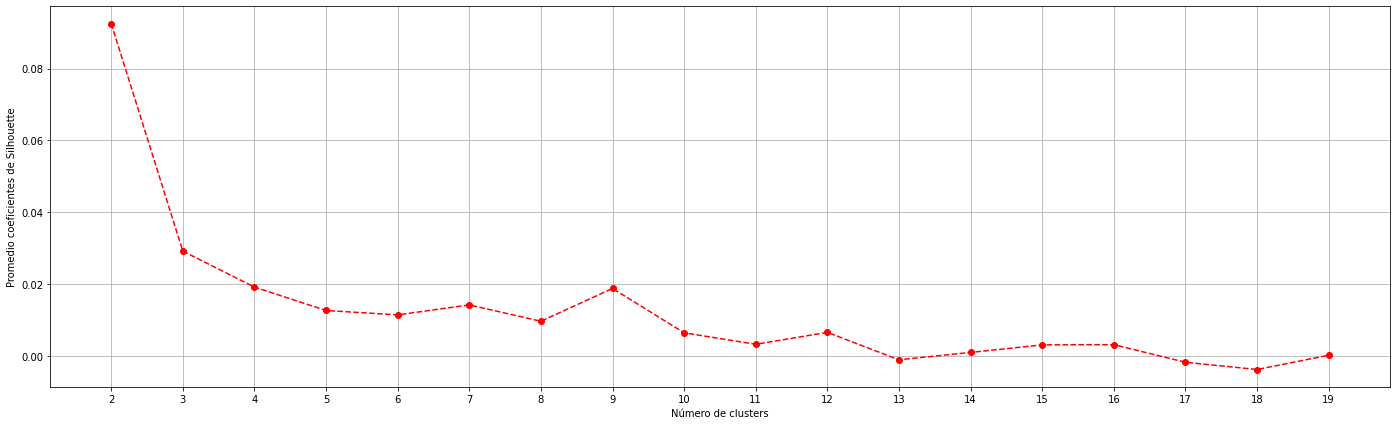

In [ ]:
fig, ax = plt.subplots(figsize = (24, 7))

# estas lineas son el grafico de SSEvsK
ax.plot(range(2, 20), silhouette_coefficients, '--o', c='red')            
ax.set_xticks(range(2, 20))
ax.set_xlabel("Número de clusters")
ax.grid(20)
ax.set_ylabel("Promedio coeficientes de Silhouette")

Vemos que hay un maximo local cerca de k=8 (esto varía al correr de nuevo la celda)

#2. Primeras 2 componentes de la matriz de sprites

Visualizar las primeras dos componentes de la matriz de sprites, pintando con un color distinto los datos que pertenezcan a cada cluster, e indicando con cruces la posición de los centroides (ayuda: el código para hacer esto se encuentra en el notebook de clustering que vimos en clase).

In [ ]:
# Clase para realizar componentes principales
from sklearn.decomposition import PCA

In [ ]:


# Creación del modelo de PCA con todas las componentes
pca = PCA(n_components = len(data))

# Ajuste y transformación de los datos
pca.fit(data)
X_pca = pca.transform(data)

# Guardo las posiciones de los centroids
kmeans = KMeans(n_clusters=8)   #k=8
kmeans.fit(X_pca)
centroids = kmeans.cluster_centers_

No handles with labels found to put in legend.


Text(0, 0.5, 'Segunda componente principal')

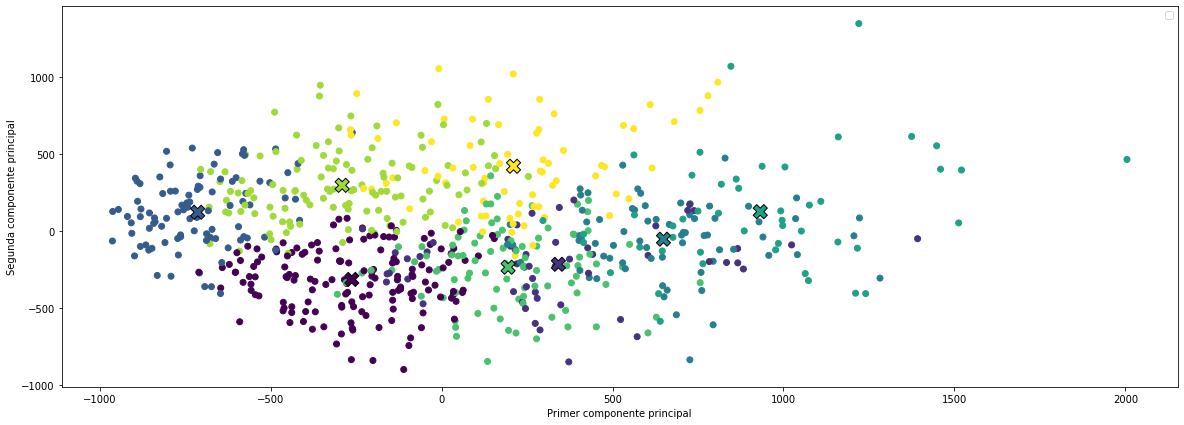

In [ ]:

fig, ax = plt.subplots(figsize = (20, 7))

# Hacemos un scatter plot de cada uno de los datos
ax.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_)
ax.scatter(centroids[:, 0], centroids[:, 1], marker="X", s=200, linewidths=1,
            c=np.unique(kmeans.labels_), edgecolors='black')
ax.legend()

# # Por cada dato escribimos a qué instancia corresponde
# for i in range(data.shape[0]):
#  ax.text(X_pca[i, 0], X_pca[i, 1], s = i)

ax.set_xlabel('Primer componente principal')
ax.set_ylabel('Segunda componente principal')

In [ ]:
# importamos los algoritmos de clusterizacion a utilizar en esta notebook   
from sklearn.cluster import AgglomerativeClustering   # Clustering jerárquico


# Estandarizador (transforma las variables en z-scores)
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler() # Creamos el estandarizador


#3. Visualización 10 elementos por cluster

Visualizar los primeros 10 elementos de cada cluster.

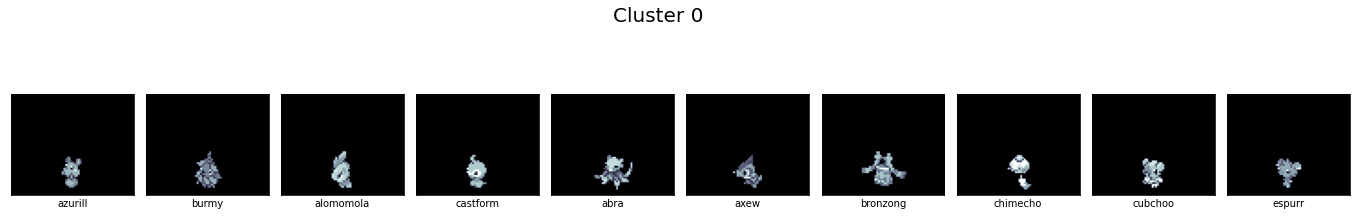

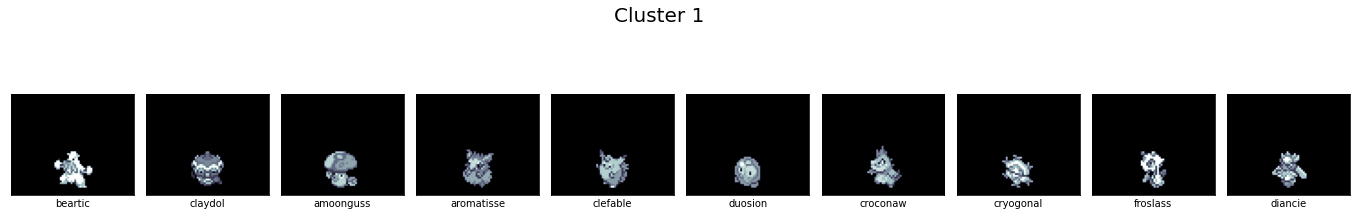

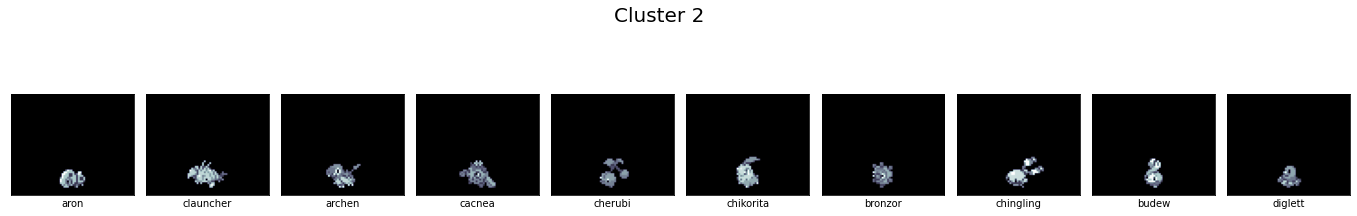

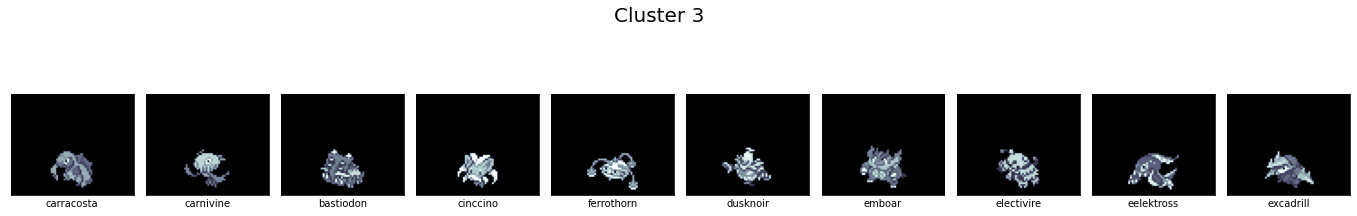

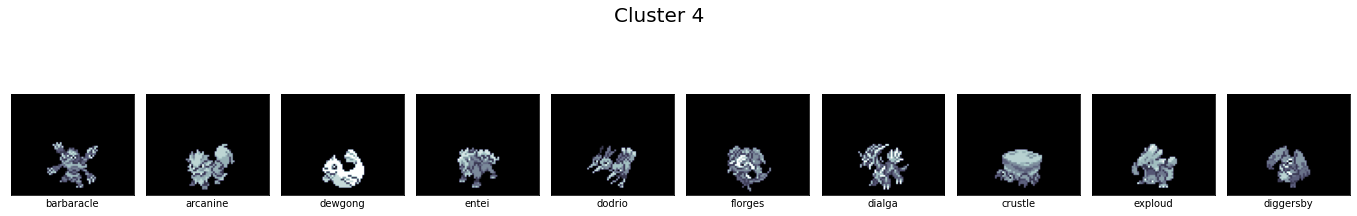

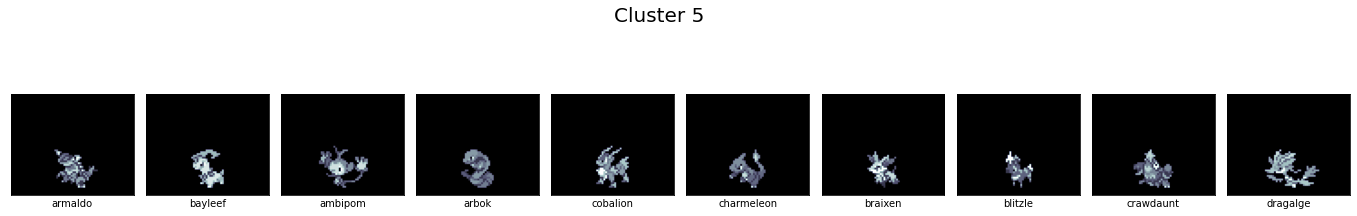

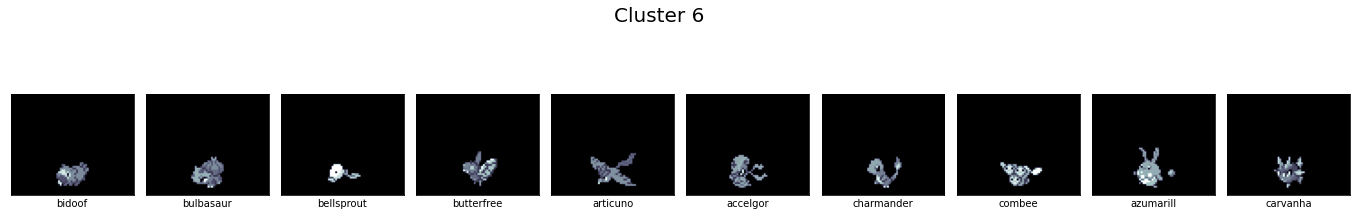

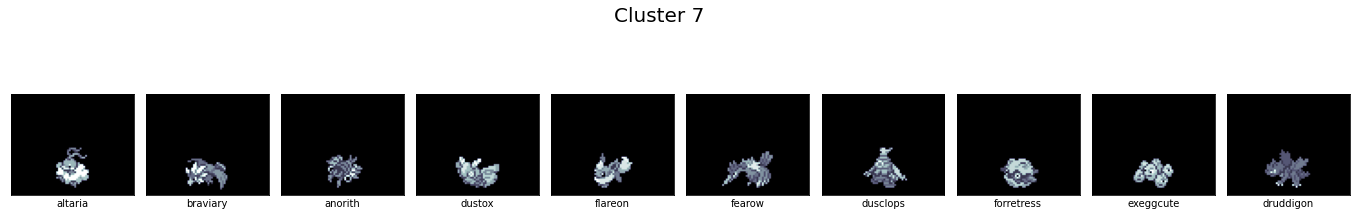

In [ ]:
# etiquetas de los clusters
labels = kmeans.labels_

# Iniciamos un for con k=40 iteraciones
for i in range(8):
    index = np.nonzero(labels==i)[0]                                    # los índices correspondientes a la i-ésima etiqueta 
    num = 10                                                   # me quedo con los 10 primeros elementos
    pokemon = data[index].reshape(len(index),56,68)                  # reshapeamos los samples del i-ésimo cluster para que tenga el formato de una imagen de (56,68) pixeles
    name = np.array(nombres)[index]
    fig, axes = plt.subplots(1, num, figsize=(24, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    fig.suptitle("Cluster " + str(i), fontsize=20)
    for j, ax in enumerate(axes.flat):
        ax.imshow(pokemon[j], cmap='bone')
        ax.set_xlabel(f'{name[j]}')

#4. y 5. valor promedio de atributos y tamaño por clase

4. En un mismo gráfico de barras, mostrar el valor promedio de los atributos HP, Attack, Defense y Speed de cada cluster. ¿Cuál es el cluster de Pokémones más fuertes?
5. Hacer lo mismo que en el ítem anterior, pero con el tamaño promedio de los Pokémones por cluster (el tamaño se define como la cantidad de entradas no vacías en la fila correspondiente al sprite de ese Pokémon en la matriz data). ¿Son los Pokémones más grandes los más fuertes?

In [ ]:
# etiquetas de los clusters
labels = kmeans.labels_
#agrego columna de clusters y la de tamaño
df['Cluster'] = -1
df['Size'] = -1
for i in range(8):
    index = np.nonzero(labels==i)[0]            # los índices correspondientes a la i-ésima etiqueta                                      
    name = np.array(nombres)[index]
    pokemon = data[index]
    for j in range(len(index)):                 #asigno el cluster y el tamaño correspondiente a cada pokemon verificando que coincide el nombre
        indice =  df['Name'] == name[j]
        df.loc[indice, 'Cluster'] = i
        size = len(np.nonzero(pokemon[j])[0])   #defino el tamaño como la cantidad de elementos cuyo valor es distinto de 0 en el array de intensidad de la imagen
        df.loc[indice, 'Size'] = size    


In [ ]:
cols_name = ['HP','Attack','Defense','Speed','Size']  #me quedo con las columnas de interes
df_filtrado = df[cols_name + ['Cluster']]

df_promedio = df_filtrado.groupby(['Cluster'])[cols_name].mean()  #promedio los atributos por cluster

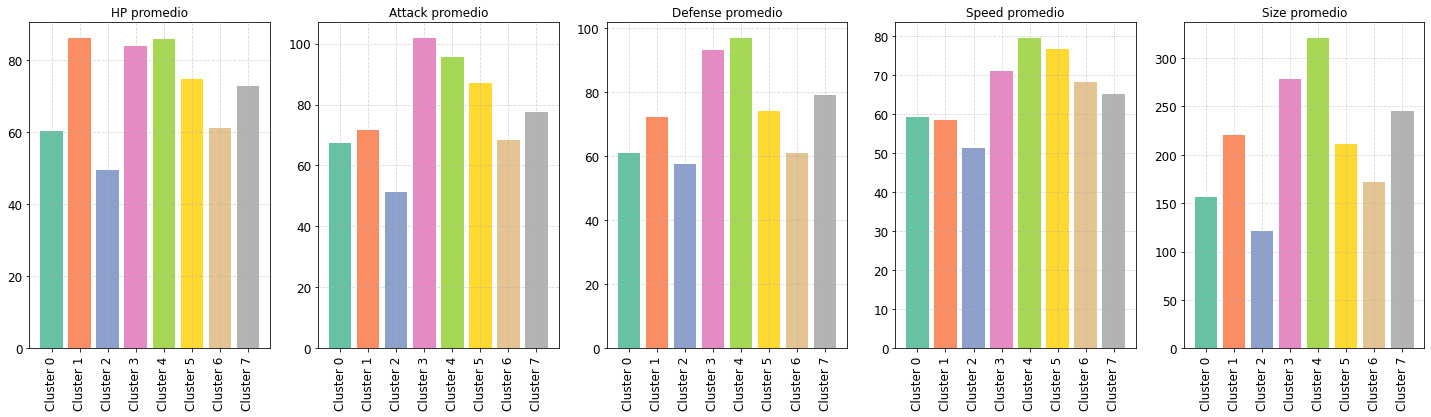

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 5, figsize = (25, 6))

for i in range(len(cols_name)):
  ax[i].set_title(f'{cols_name[i]} promedio')

  ax[i].bar(x = [i for i in range(8)], #k=8
           height = df_promedio[cols_name[i]].values , 
           color = plt.get_cmap('Set2').colors
           )
  ax[i].set_xticks([i for i in range(8)])  
  ax[i].set_xticklabels([f'Cluster {i}' for i in range(8)],
                       rotation = 90
                       )
  ax[i].tick_params(axis='both', which='major', labelsize = 12)
  ax[i].grid('on', linestyle = 'dashed', alpha = 0.5)


Verificamos si el cluster de mayor ataque coincide con el de mayor tamaño

In [ ]:
df_promedio.idxmax(axis = 0)

HP         1
Attack     3
Defense    4
Speed      4
Size       4
dtype: int64

Vemos que efectivamente el cluster con mayor ataque coincide con el cluster de mayor tamaño

#6. Pokemones legendarios por cluster

6. Hacer gráficos de torta con la proporción de Pokémones legendarios/no legendarios por cluster. ¿Tiene el cluster de Pokémones más fuertes más legendarios que los otros?

armo lista con la cantidad de legendarios/nolegendarios por cluster

In [ ]:

df_countLegend = df.groupby(['Cluster'])['Legendary'].value_counts()   #cantidad de legendarios por cluster
legendarios = []
no_legendarios = []
for i in range(8):
  try:
    legendarios.append(df_countLegend[i][True])
  except:
    legendarios.append(0)

for i in range(8):
  try:
    no_legendarios.append(df_countLegend[i][False])
  except:
    no_legendarios.append(0)

Vemos que en general hay una mayor cantidad de legendarios en el cluster más fuerte

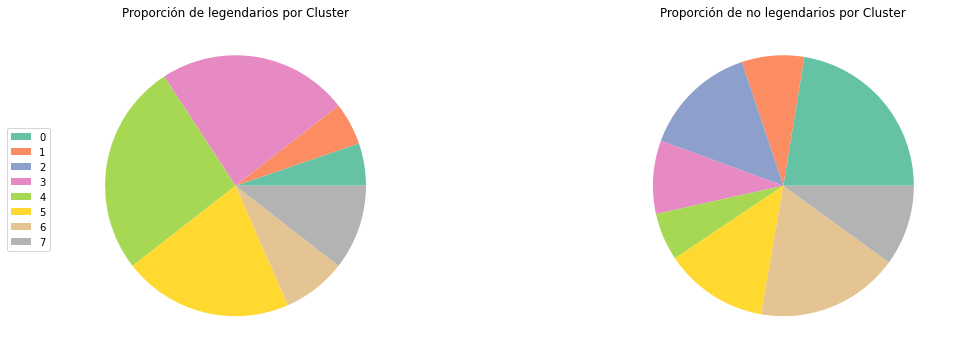

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (18, 6))

# gráfico de torta de la proporción de legendarios por cluster
ax[0].pie(legendarios,
           colors = plt.get_cmap('Set2').colors)
ax[0].legend(range(8),loc = (-0.2,0.3))
ax[0].set_title("Proporción de legendarios por Cluster")
ax[1].pie(no_legendarios,
           colors = plt.get_cmap('Set2').colors)
ax[1].set_title("Proporción de no legendarios por Cluster")
plt.show()